In [4]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import ClusteredDifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [15]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 4
targetError = 1e-8

# Algorithm Parameters
pop_size = 30
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
cluster_rate = .01
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = 1
opposition = False
input_data_filepath = './../input_data'
active = False

In [16]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_10_4_30_1_1_False_None]'

In [17]:
alg = ClusteredDifferentialEvolution(dim=dim, func_id=funcId, cluster_rate=cluster_rate, pop_size=pop_size, crossover=crossover, 
        mutation=mutation, lambda_mutation=lambda_mutation)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at  ./results/CDE/best/1/bin/[1_10_4_30_1_1_False_None]log.tsv


[0:00:00][----------] 0.00% Clustered Optimization ended due to max fitness evals (max = 100000, curr = 100000)

#Generations:	3357
#FitnessEvals:	100000
Mean Fitness:	100.000572723
Best Fitness:	100.000543195
Solution:	100.0
Diff:		0.000543195
[0:04:00][##--------] 25.00% 
#Generations:	1264
#FitnessEvals:	37670
Mean Fitness:	100.000000014
Best Fitness:	100.000000010
Solution:	100.0
Diff:		0.000000010
Target error achieved with error 9.929365774041798e-09
[0:05:33][#####-----] 50.00% 
#Generations:	1692
#FitnessEvals:	50510
Mean Fitness:	100.000000016
Best Fitness:	100.000000007
Solution:	100.0
Diff:		0.000000007
Target error achieved with error 7.0037486921137315e-09
[0:07:21][########--] 75.00% 
#Generations:	3349
#FitnessEvals:	100020
Mean Fitness:	554.973053120
Best Fitness:	552.648438313
Solution:	100.0
Diff:		452.648438313
[0:10:43][##########] 100.00% Done...


C:\Anaconda\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


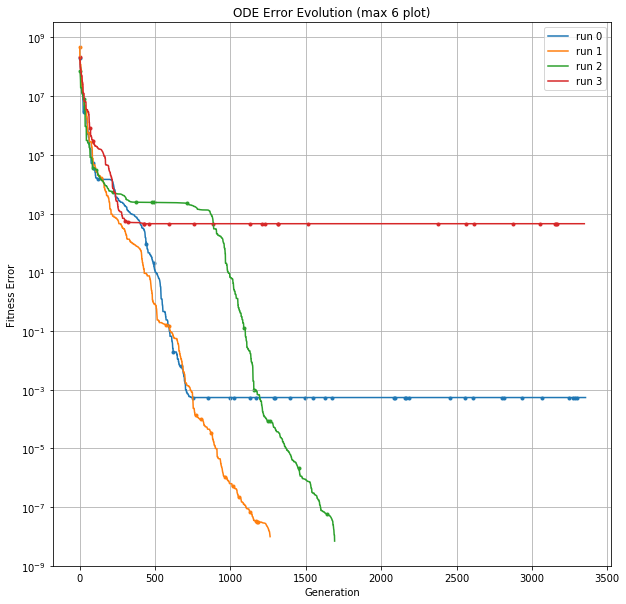

In [19]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
fig, ax = plt.subplots(figsize=(10,10))
max_plots = 6
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = ClusteredDifferentialEvolution(dim=dim, func_id=funcId, cluster_rate=cluster_rate, pop_size=pop_size, crossover=crossover, 
        mutation=mutation, lambda_mutation=lambda_mutation)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
    if (idx_run < max_plots):
        arr = errorHist.drop(['run'], axis=1).min(axis=1)    
        ax.scatter(np.arange(alg.generations), 
                   [None if x == pop_size else arr[i] for i, x in enumerate(alg.fitnessEvalsHist[:-1])],
                   marker='.'
                  )
        ax.plot(arr, label='run ' + str(idx_run))
    
ax.set_yscale('log')
ax.grid(True)
ax.set_title('ODE Error Evolution (max {} plot)'.format(max_plots))
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness Error')
ax.legend()
# fig.savefig(output_filepath + 'fitness_evolution.jpeg', bbox_inches='tight')

hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

In [9]:
print ("Success Rate:", successRate)
print ("Elapsed Time: ", progbar.get_elapsed_time())

Success Rate: 1
Elapsed Time:  0:01:44


In [10]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,run
generation,,,,,,,,,,,,,,,,,,,,,
1139,2.315274e-08,1.506945e-08,1.511432e-08,1.585880e-08,1.910655e-08,1.747355e-08,1.744948e-08,1.451825e-08,1.004734e-08,1.685078e-08,...,1.889515e-08,1.319778e-08,1.801178e-08,1.184414e-08,1.264462e-08,1.727271e-08,1.353203e-08,1.627332e-08,1.625600e-08,0
1140,2.315274e-08,1.506945e-08,1.511432e-08,1.585880e-08,1.635307e-08,1.667961e-08,1.458341e-08,1.393464e-08,1.004734e-08,1.685078e-08,...,1.889515e-08,1.319778e-08,1.801178e-08,1.184414e-08,1.264462e-08,1.727271e-08,1.100128e-08,1.580682e-08,1.625600e-08,0
1141,2.315274e-08,1.179154e-08,1.490889e-08,1.585880e-08,1.635307e-08,1.667961e-08,1.458341e-08,1.393464e-08,1.004734e-08,1.028194e-08,...,1.889515e-08,1.319778e-08,1.801178e-08,1.184414e-08,1.264462e-08,1.727271e-08,1.100128e-08,1.057089e-08,1.625600e-08,0
1142,1.289189e-08,1.179154e-08,1.378001e-08,1.585880e-08,1.635307e-08,1.667961e-08,1.458341e-08,1.393464e-08,1.004734e-08,1.028194e-08,...,1.889515e-08,1.319778e-08,1.801178e-08,1.184414e-08,1.264462e-08,1.727271e-08,1.100128e-08,1.057089e-08,1.625600e-08,0
1143,1.289189e-08,1.179154e-08,1.378001e-08,1.585880e-08,1.635307e-08,1.667961e-08,1.458341e-08,1.393464e-08,1.004734e-08,1.028194e-08,...,1.602606e-08,9.923752e-09,1.801178e-08,1.184414e-08,1.264462e-08,1.727271e-08,1.100128e-08,1.057089e-08,1.625600e-08,0


In [11]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))        
arr_error = np.array(arr_error)

Best error for run 0: 9.923752486429294e-09


In [12]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to  ./results/CDE/best/1/bin/[1_10_1_30_1_1_True_None]df_sumup.tsv


,algorithm,#Fc,D,percFES,run_1,mean,elapsed_time,evals
0,CDE/best/1/bin,1,10,1,9.923752e-09,9.923752e-09,0:01:44,34030


In [ ]:
# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
# label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
# # label = ''
# ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
# ax2 = ax.twinx()
# ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
# ax2.set_ylabel('Mean Minimum Error (dB)')

# ax.grid(True)
# ax.set_ylabel('Mean Minimum Error')
# ax.legend()
# ax.set_xlabel('Generation')
# ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
# plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')